In [1]:
!pip install PyMuPDF
!pip install pillow
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [14]:
!pip install PyMuPDF
!pip install Pillow
!pip install pytesseract

import fitz
import pytesseract
from PIL import Image
import io

def ocr_pdf_with_positions(pdf_path, search_word, dpi=300):
    doc = fitz.open(pdf_path)
    results = []
    for page_index in range(doc.page_count):
        page = doc[page_index]
        pix = page.get_pixmap(dpi=dpi)
        pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        ocr_data = pytesseract.image_to_data(pil_image, output_type=pytesseract.Output.DICT)
        for i, text in enumerate(ocr_data["text"]):
            if search_word.lower() in text.lower():
                x = ocr_data["left"][i]
                y = ocr_data["top"][i]
                w = ocr_data["width"][i]
                h = ocr_data["height"][i]
                results.append({
                    "page_number": page_index + 1,
                    "found_text": text,
                    "bbox_image_coords": (x, y, w, h)
                })
    return results

pdf_path = "./Gold_Coast_VTC_28NOV2024.pdf"
word_to_find = "heck"
found_positions = ocr_pdf_with_positions(pdf_path, word_to_find)

for item in found_positions:
    print(
        f"Page {item['page_number']}:\n"
        f"Text: {item['found_text']}\n"
        f"BBox (image coords): {item['bbox_image_coords']}\n"
    )


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Page 1:
Text: Heck
BBox (image coords): (3919, 1568, 83, 49)



In [15]:
def get_page_bounding_box(pdf_path, dpi=300):
    doc = fitz.open(pdf_path)
    page_bounding_boxes = []
    for page_index in range(doc.page_count):
        page = doc[page_index]
        pix = page.get_pixmap(dpi=dpi)
        width, height = pix.width, pix.height
        page_bounding_boxes.append({
            "page_number": page_index + 1,
            "bbox_image_coords": (0, 0, width, height)
        })
    return page_bounding_boxes

page_bounding_boxes = get_page_bounding_box(pdf_path)

for item in page_bounding_boxes:
    print(
        f"Page {item['page_number']}:\n"
        f"BBox (image coords): {item['bbox_image_coords']}\n"
    )


Page 1:
BBox (image coords): (0, 0, 6142, 12048)



Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.2 MB/s eta 0:00:00


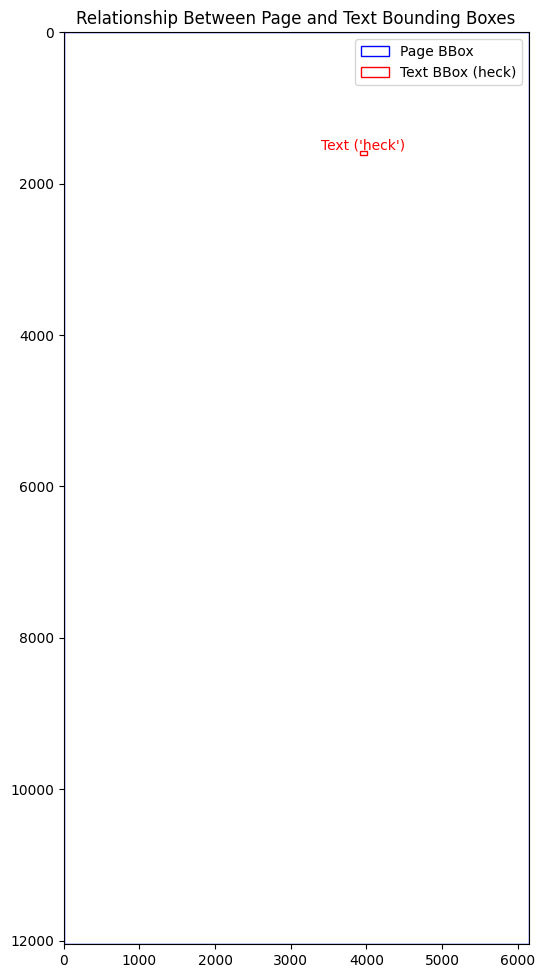

In [2]:
!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Page bounding box dimensions
page_width, page_height = 6142, 12048

# Text bounding box dimensions (heck)
text_bbox = (3919, 1568, 83, 49)  # (x, y, width, height)
text_x, text_y, text_w, text_h = text_bbox

# Create a visualization
fig, ax = plt.subplots(figsize=(6, 12))
ax.set_xlim(0, page_width)
ax.set_ylim(page_height, 0)  # Invert y-axis for correct orientation

# Add the page bounding box
page_rect = patches.Rectangle((0, 0), page_width, page_height, linewidth=1, edgecolor='blue', facecolor='none', label='Page BBox')
ax.add_patch(page_rect)

# Add the text bounding box
text_rect = patches.Rectangle((text_x, text_y), text_w, text_h, linewidth=1, edgecolor='red', facecolor='none', label='Text BBox (heck)')
ax.add_patch(text_rect)

# Annotate
ax.annotate("Text ('heck')", (text_x + text_w / 2, text_y - 20), color='red', ha='center')
ax.set_title("Relationship Between Page and Text Bounding Boxes")
ax.legend()

# Ensure the visualization appears inline
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
